In [17]:
import os
import copy
# import skillsnetwork

import numpy as np
from numpy.core.fromnumeric import reshape

import tensorflow as tf

import keras
from keras import layers,Input,Sequential
from keras.layers import Dense,Flatten,Reshape,Conv2DTranspose,Conv2D
from keras.models import Model


from keras.layers import Conv2D
# def warn(*args, **kwargs):
    # pass
import warnings
# warnings.warn = warn
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [3]:
def plot_images(top,bottom,start=0,stop=5,reshape_x=(28,28),reshape_xhat=(28,28)):

    '''
    this function plots images from the start index to the stop index from two datasets

    '''

    n_samples=stop-start

    for i,img_index in enumerate(range(start,stop)):

        # Display original
        ax = plt.subplot(2, n_samples, i + 1)
        plt.imshow(top[img_index].reshape(reshape_x[0], reshape_x[1]), cmap="gray")

        if i==n_samples//2:
            plt.title("original images")

        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n_samples, i + 1 + n_samples)
        plt.imshow(bottom[img_index].reshape(reshape_xhat[0], reshape_xhat[1]), cmap="gray")


        if i==n_samples//2:
            plt.title("encoded images")

        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [4]:
def graph_history(history, title='Log Loss and Accuracy over iterations'):

    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(title)
    N_plots=len(history.history.keys())
    color_list=['b', 'r', 'g', 'c', 'm', 'y', 'k', 'w','bx','rx']
    for i,(key, items) in enumerate(history.history.items()):
        ax = fig.add_subplot(1, N_plots, i+1)
        ax.plot(items,c=color_list[i])
        ax.grid(True)
        ax.set(xlabel='iterations', title=key)

In [5]:
def add_noise(x_train, x_test, noise_factor = 0.3):
    '''
    this function adds random values from a normal distribution as noises to the data

    returns the noisy datasets

    '''
    noise_factor = 0.3
    x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
    x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.).numpy()
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.).numpy()

    return x_train_noisy,x_test_noisy

In [6]:
def plot_code(h, y, numbers=[0,1,2,3,4,5,6,7,8,9], scale=[1,1,1]):
    """
    number: list of classes to be plotted
    scale: scale activations to plot better

    """
    h=h.numpy()
    color_list=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink','darkorange','lime']
    logic_array =np.zeros(len(y), dtype=bool)

    fig=plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    for num, color in zip(numbers, color_list):
        logic_array = (y==num)
        plt.scatter(scale[0]*h[logic_array,0],scale[1]*h[logic_array,1],scale[2]*h[logic_array,2],c=color, label=num)

    plt.title("3D output of encoder, colored by digits")
    plt.legend(loc=[1.1,0.3])
    plt.show()

In [7]:
def avg(shape, dtype=None):
    grad = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
        ]).reshape((3, 3, 1, 1))/9

    assert grad.shape == shape
    return keras.backend.variable(grad, dtype='float32')

a_conv = layers.Conv2D(filters=1,
                       kernel_size=3,
                       kernel_initializer=avg,
                       strides=1,
                       padding='same')




In [8]:
def display_auto(Xiter,n=1,B=1):

    """
    This function displays the ouput of an autoencder
    Returns:  void images
    Args:
    Xiter:image_dataset_from_directory object converted to iterator
    n:sample within batch
    B: batch number
    """

    for b in range(B):
        x = next(Xiter)

        plt.imshow(x[1].numpy()[n,:,:,0],cmap="gray")
        plt.title("input")
        plt.show()
        plt.imshow(x[0].numpy()[n,:,:,0],cmap="gray")
        plt.title("output")
        plt.show()

In [9]:
from keras.datasets import mnist

In [10]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
input_img=Input(shape=(784,))

In [12]:
encoding_dim=36
encoder = Dense(encoding_dim, activation='relu')(input_img)

In [13]:
decoder=Dense(784,activation='sigmoid')(encoder)

In [14]:
autoencoder =Model(input_img, decoder)

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
history=autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.3747 - val_loss: 0.1853
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1758 - val_loss: 0.1477
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1437 - val_loss: 0.1288
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1269 - val_loss: 0.1164
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1155 - val_loss: 0.1082
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1083 - val_loss: 0.1024
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1026 - val_loss: 0.0982
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0987 - val_loss: 0.0950
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0958 - val_loss: 0.0927
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0935 - val_loss: 0.0910
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0921 - val_loss: 0.0900
Epoch 12/25
 91/235 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

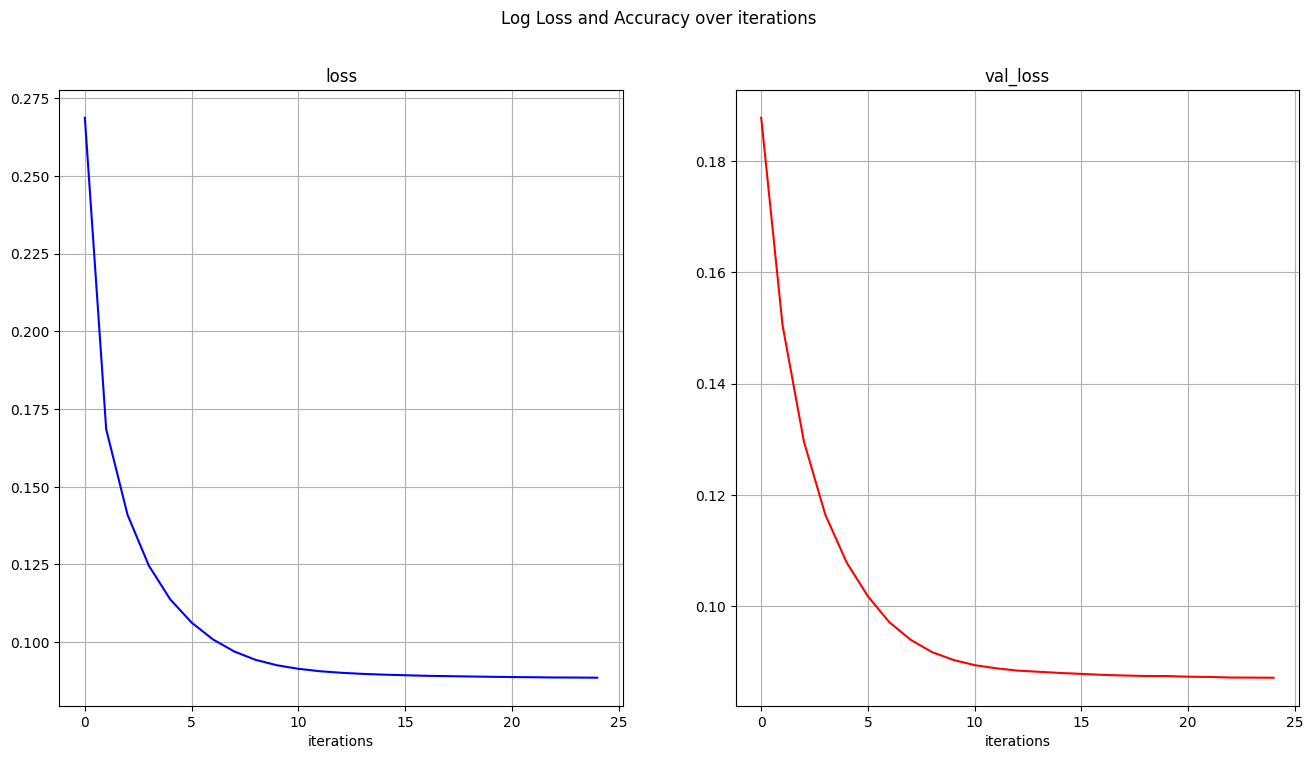

In [ ]:
graph_history(history, title='Log Loss and Accuracy over iterations')

In [ ]:
xhat=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


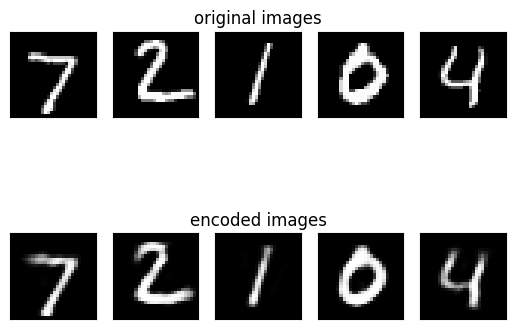

In [ ]:
plot_images(x_test,xhat,start=0,stop=5)

In [ ]:
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = Dense(latent_dim, activation='relu')
        self.decoder = Dense(784, activation='sigmoid')

    def call(self, x):
        
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
encoding_dim=36
autoencoder = Autoencoder(encoding_dim)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3822 - val_loss: 0.1857
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1754 - val_loss: 0.1474
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1438 - val_loss: 0.1287
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1272 - val_loss: 0.1175
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1172 - val_loss: 0.1100
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1098 - val_loss: 0.1040
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1044 - val_loss: 0.0992
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0998 - val_loss: 0.0955
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0965 - val_loss: 0.0929
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0938 - val_loss: 0.0912
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0924 - val_loss: 0.0900
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

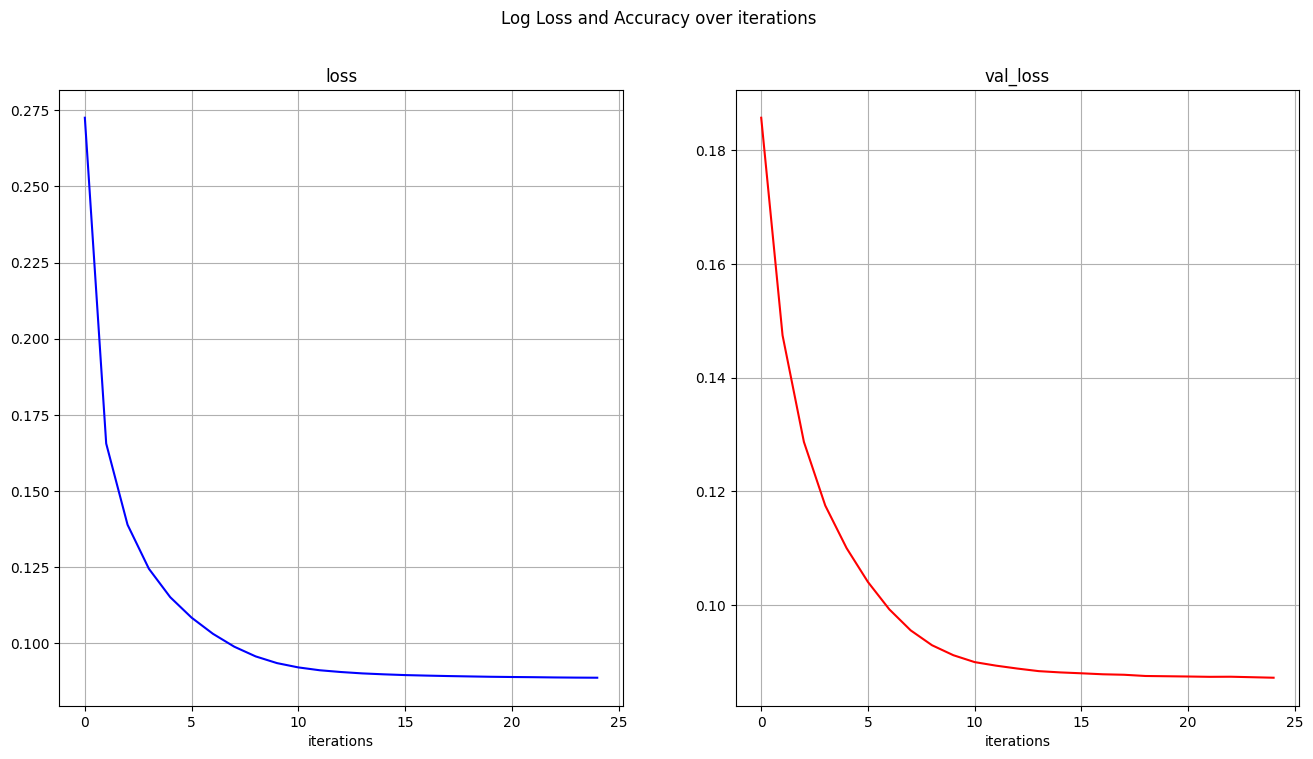

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history=autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
graph_history(history, title='Log Loss and Accuracy over iterations')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


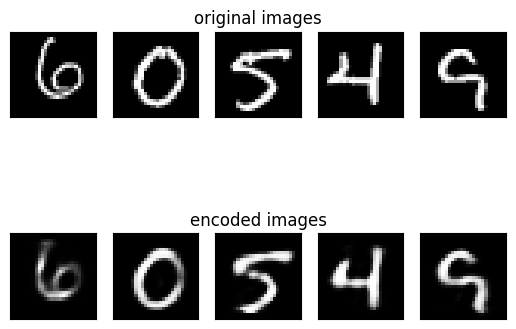

In [ ]:
xhat=autoencoder.predict(x_test)
plot_images(x_test,xhat,start=100,stop=105)

In [ ]:
h=autoencoder.encoder(x_test)
h.shape

TensorShape([10000, 36])

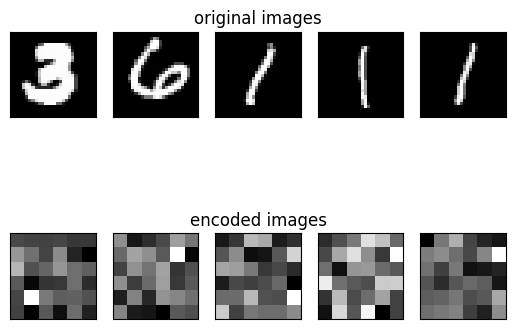

In [ ]:
plot_images(x_test, h.numpy(),start=200,stop=205,reshape_x=(28,28),reshape_xhat=(6,6))

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
loss=[bce(x, x_s).numpy() for x, x_s in zip (x_test,xhat)]

In [ ]:
indexs=np.flip(np.argsort(loss))

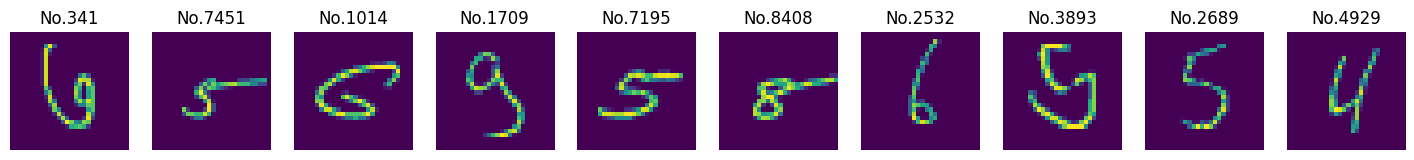

In [ ]:
plt.figure(figsize=(18,3))
for i, index in enumerate(indexs[0:10]):

    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[index].reshape(28,28))
    plt.title(f"No.{index}")
    plt.axis("off")

In [ ]:
x_train_noisy,x_test_noisy= add_noise(x_train, x_test,noise_factor = 0.4)

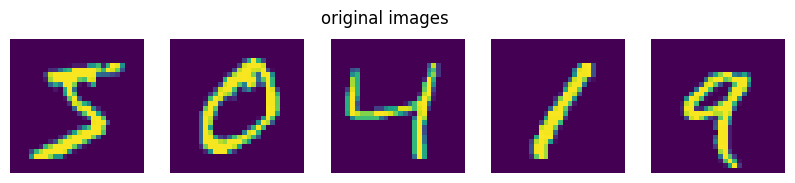

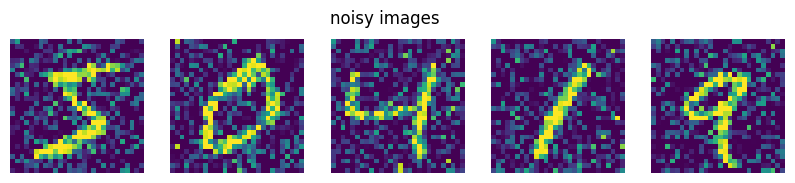

In [ ]:
fig1 = plt.figure(figsize=(10,2))
fig1.suptitle("original images")
fig2 = plt.figure(figsize=(10,2))
fig2.suptitle("noisy images")

for i, img_index in enumerate(range(5)):
    ax1 = fig1.add_subplot(1, 5, i+1)
    ax1.imshow(x_train[img_index].reshape((28,28)))
    ax1.axis("off")
    ax2 = fig2.add_subplot(1, 5, i+1)
    ax2.imshow(x_train_noisy[img_index].reshape((28,28)))
    ax2.axis("off")

In [ ]:
encoding_dim=2*x_test.shape[1]
autoencoder = Autoencoder(encoding_dim)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - loss: 0.2136 - val_loss: 0.0957
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - loss: 0.0934 - val_loss: 0.0873
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - loss: nan - val_loss: nan
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: nan - val_loss: nan
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: nan - val_loss: nan
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - loss: nan - val_loss: nan
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: nan - val_loss: nan
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: nan - val_loss: nan
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - loss: nan - val_loss: nan
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - loss: nan - val_loss: nan
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: nan - val_loss: nan
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: nan - val

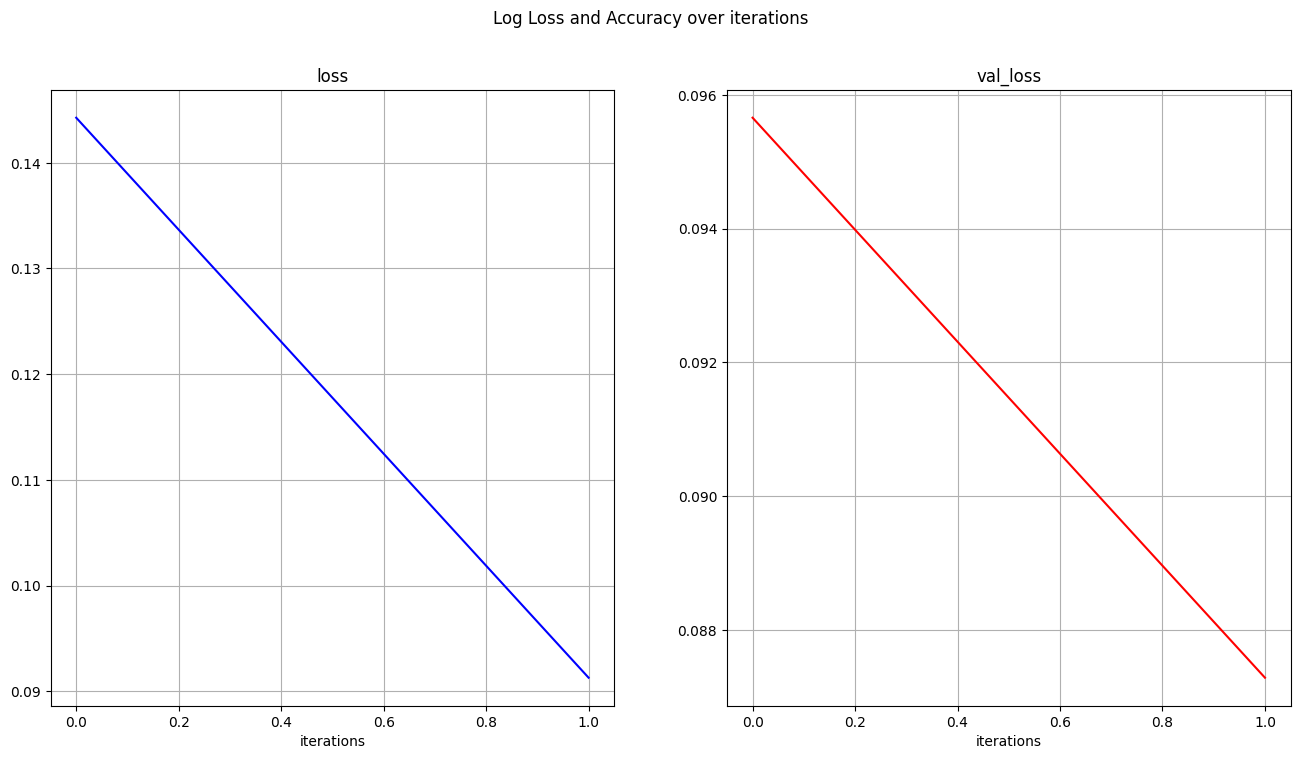

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history=autoencoder.fit(x_train_noisy , x_train,epochs=25,batch_size=256,shuffle=True,validation_data=(x_test_noisy, x_test))
graph_history(history, title='Log Loss and Accuracy over iterations')
xhat=autoencoder.predict(x_test)

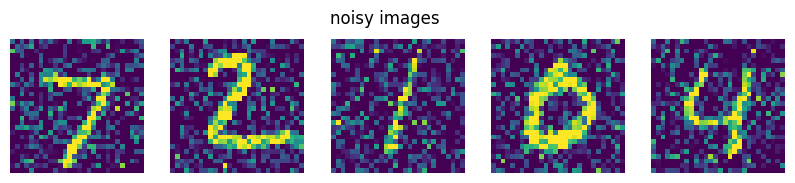

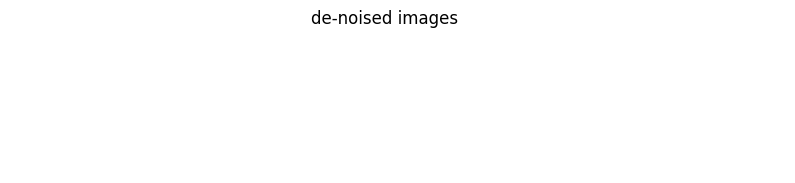

In [ ]:
fig1 = plt.figure(figsize=(10,2))
fig1.suptitle("noisy images")
fig2 = plt.figure(figsize=(10,2))
fig2.suptitle("de-noised images")

for i, img_index in enumerate(range(5)):
    ax1 = fig1.add_subplot(1, 5, i+1)
    ax1.imshow(x_test_noisy[img_index].reshape((28,28)))
    ax1.axis("off")
    ax2 = fig2.add_subplot(1, 5, i+1)
    ax2.imshow(xhat[img_index].reshape((28,28)))
    ax2.axis("off")

### Exercise 1 
In this exercise, you will use the encoder part of an Autoencoder for low-dimensional data visualization. 

- Create an autocoder using the class `Autoencoder`, with latent dimension of 3; 
- Fit the autoencoder model using the training set `x_train` and validate using the test set `x_test`; 
- Apply the `.encoder` method of the autoencoder on the test set `x_test`;
- Display the output using the **plot_code** helper function.


In [ ]:
autoencoder = Autoencoder(3)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
h=                                              autoencoder.encoder(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4897 - val_loss: 0.2762
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2720 - val_loss: 0.2516
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2473 - val_loss: 0.2360
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2359 - val_loss: 0.2313
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2321 - val_loss: 0.2287
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2293 - val_loss: 0.2268
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2277 - val_loss: 0.2253
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2266 - val_loss: 0.2240
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2256 - val_loss: 0.2231
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2245 - val_loss: 0.2221
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2239 - val_loss: 0.2213
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

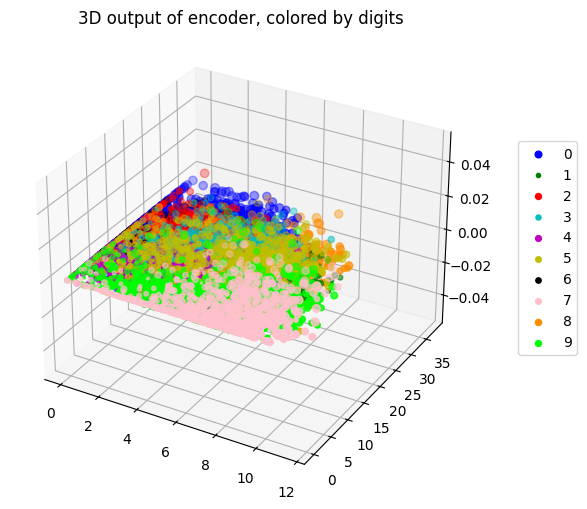

In [ ]:
plot_code(h,y_test)

### Exercise 2
In this exercise, you will work with a different dataset, which is the fashion MNIST dataset downloaded from Keras. You will use an autoencoder to try to reconstruct the images and analyze the results.


In [ ]:
(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_temp=layers.Flatten()(x_train)
x_temp_test=layers.Flatten()(x_test)
x_temp.shape, x_temp_test.shape

(TensorShape([60000, 784]), TensorShape([10000, 784]))

In [ ]:
encoding_dim = 3
autoencoder = Autoencoder(encoding_dim)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_temp, x_temp, epochs=25, batch_size=256, shuffle=True, validation_data=(x_temp_test, x_temp_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5946 - val_loss: 0.4166
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4045 - val_loss: 0.3914
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3875 - val_loss: 0.3839
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3808 - val_loss: 0.3792
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3771 - val_loss: 0.3755
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3728 - val_loss: 0.3725
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3701 - val_loss: 0.3699
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3675 - val_loss: 0.3677
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3658 - val_loss: 0.3657
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3638 - val_loss: 0.3642
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3623 - val_loss: 0.3631
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

In [ ]:
xhat=autoencoder.predict(x_temp_test)
plot_images(x_test,xhat,start=0,stop=5)

NameError: name 'autoencoder' is not defined

## Deep Autoencoders 


In [18]:
class Deep_Autoencoder (Model):
    def __init__(self, latent_dim_1, latent_dim_2):
        super(Deep_Autoencoder, self).__init__()
        self.latent_dim_1= latent_dim_1  
        self.latent_dim_1= latent_dim_2 
        self.encoder = Sequential([layers.Flatten(),Dense(latent_dim_1, activation='relu'),Dense(latent_dim_2, activation='relu')])
        self.decoder = tf.keras.Sequential([Dense(latent_dim_1, activation='relu'), Dense(784, activation='sigmoid'), Reshape((28, 28))])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [20]:
latent_dim_1 =128
latent_dim_2=3
deep_autoencoder=Deep_Autoencoder(latent_dim_1=latent_dim_1,latent_dim_2=latent_dim_2)


deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history=deep_autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 784), output.shape=(None, 28, 28)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


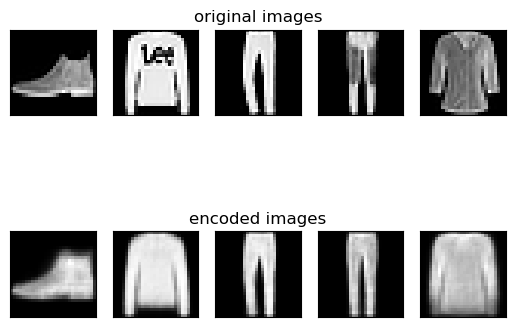

In [ ]:
xhat=deep_autoencoder.predict(x_test)
plot_images(x_test,xhat,start=0,stop=5)